# House price prediction problem
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
housetrain=pd.read_csv("/Users/GGS/Desktop/25Nov18/ML/Housepricepredict/train.csv")

In [3]:
housetest=pd.read_csv("/Users/GGS/Desktop/25Nov18/ML/Housepricepredict/test.csv")

In [4]:
housetrain.shape

(1460, 81)

In [6]:
housetrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house_train_num=housetrain.select_dtypes(include=[np.number])

In [8]:
house_train_cat=housetrain.select_dtypes(include=['object']) 

In [9]:
house_train_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
house_train_num_corr=house_train_num.corr()

In [11]:
house_train_num_corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [12]:
house_train_num_cols = []
house_train_num_cols.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]>0.3) ].index.values)
house_train_num_cols.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]<-0.3) ].index.values)

In [13]:
house_train_num_cols

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [14]:
h_train_num_col_filtered=house_train_num[house_train_num_cols]

In [15]:
h_train_num_col_filtered.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [16]:
(house_train_num.isnull().sum().sort_values(ascending=False))


LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [17]:
for hc in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    print (hc)
    print(house_train_num[hc].mean())
    print(house_train_num[hc].median())
    print ("&&&&&&&&&&&&&&&&&&&&&&&&&&")

LotFrontage
70.049958368
69.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageYrBlt
1978.50616389
1980.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
MasVnrArea
103.685261708
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&


In [18]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
house_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [22]:
(house_train_cat.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [23]:
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    house_train_cat[col].fillna('No Value',inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond","MasVnrType","Electrical"]:
    house_train_cat[col].fillna(house_train_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
house_train_cat1=house_train_cat.apply(le.fit_transform)

In [26]:
house_train_cat1.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,1,8,4


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
Linreg=LinearRegression()

In [29]:

housetraindf1=pd.concat([h_train_num_col_filtered,house_train_cat1],axis=1)

In [30]:
X1=housetraindf1.drop(["SalePrice"],axis=1)

In [31]:
y=housetraindf1["SalePrice"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

In [34]:
house_test_num=housetest.select_dtypes(include=[np.number])
house_test_cat=housetest.select_dtypes(include=['object'])

In [35]:
house_train_num_cols.remove('SalePrice')

In [36]:
h_test_num_col_filtered=house_test_num[house_train_num_cols]

In [37]:
(h_test_num_col_filtered.isnull().sum().sort_values(ascending=False))

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
TotalBsmtSF       1
GarageArea        1
GarageCars        1
BsmtFinSF1        1
OverallQual       0
YearBuilt         0
YearRemodAdd      0
OpenPorchSF       0
1stFlrSF          0
WoodDeckSF        0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
2ndFlrSF          0
dtype: int64

In [38]:
for hc in ["LotFrontage","GarageYrBlt","MasVnrArea","TotalBsmtSF","GarageArea","GarageCars","BsmtFinSF1"]:
    print (hc)
    print(h_test_num_col_filtered[hc].mean())
    print(h_test_num_col_filtered[hc].median())
    print ("&&&&&&&&&&&&&&&&&&&&&&&&&&")

LotFrontage
68.5803571429
67.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageYrBlt
1977.72121651
1979.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
MasVnrArea
100.709141274
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
TotalBsmtSF
1046.11796982
988.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageArea
472.768861454
480.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
GarageCars
1.76611796982
2.0
&&&&&&&&&&&&&&&&&&&&&&&&&&
BsmtFinSF1
439.203703704
350.5
&&&&&&&&&&&&&&&&&&&&&&&&&&


In [39]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea","TotalBsmtSF","GarageArea","GarageCars","BsmtFinSF1"]:
    h_test_num_col_filtered[col].fillna(h_test_num_col_filtered[col].median(),inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [40]:
(house_test_cat.isnull().sum().sort_values(ascending=False))

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MSZoning            4
Utilities           2
Functional          2
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition2          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
Electrical          0
CentralAir          0
SaleCondition       0
dtype: int64

In [41]:
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    house_test_cat[col].fillna('No Value',inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [42]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtQual","BsmtCond","BsmtFinType2","BsmtExposure","BsmtFinType1","MasVnrType","MSZoning","Utilities","Functional","KitchenQual","SaleType","Exterior2nd","Exterior1st"]:
    house_test_cat[col].fillna(house_test_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning_1\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [43]:
(house_test_cat.isnull().sum().sort_values(ascending=False))

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [44]:
house_test_cat1=house_test_cat.apply(le.fit_transform)

In [45]:
housetestdf1=pd.concat([h_test_num_col_filtered,house_test_cat1],axis=1)

In [46]:
housetestdf1.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,...,1,2,3,4,2,2,2,1,8,4
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,...,1,2,3,4,2,2,4,0,8,4
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,...,1,0,3,4,2,2,2,1,8,4
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,...,1,0,3,4,2,2,4,1,8,4
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,...,1,1,3,4,2,2,4,1,8,4


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
DecTree=DecisionTreeRegressor()

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RandFor=RandomForestRegressor(n_estimators=5000)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
GBM=GradientBoostingRegressor(n_estimators=3000)

In [53]:
LM=Linreg.fit(X_train,y_train)

In [54]:
LM.score(X_train,y_train)

0.86396322468223485

In [55]:
dt_M=DecTree.fit(X_train,y_train)

In [56]:
dt_M.score(X_train,y_train)

1.0

In [57]:
rf_M=RandFor.fit(X_train,y_train)

In [58]:
rf_M.score(X_train,y_train)

0.98163557288444159

In [59]:
gb_M=GBM.fit(X_train,y_train)

In [60]:
gb_M.score(X_train,y_train)

0.99999351575680895

In [61]:
from sklearn.metrics import accuracy_score, r2_score

In [62]:
gb_y_pred = gb_M.predict(X_test)
rf_y_pred = rf_M.predict(X_test)
lm_y_pred = LM.predict(X_test)

In [63]:
r2_score(y_test,gb_y_pred)

0.85094564347478507

In [64]:
r2_score(y_test,rf_y_pred)

0.81492502128490041

In [65]:
r2_score(y_test,lm_y_pred)

0.77728056285617053

In [66]:
y_eval=gb_M.predict(housetestdf1)

In [67]:
DecTree_0=DecisionTreeRegressor()
RandFor_0=RandomForestRegressor(n_estimators=5000)

In [68]:
pd.DataFrame(y_eval).to_csv('gbm.csv')

In [69]:
from sklearn.model_selection import KFold

In [70]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [77]:
test_scores={}
train_scores={}
kmax=2
train_cols=X_train.shape[1]
train_cols_25 = int(train_cols/4)
train_cols_50 = int(train_cols_25*2)
train_cols_75 = int(train_cols_25*3)
#for n_comp in [train_cols_25]:
for n_comp in [train_cols_25,train_cols_50,train_cols_75,train_cols]:
    kf = KFold(n_splits=kmax)
    sum_train = 0
    sum_test = 0
    data = housetraindf1
    for train, test in kf.split(data):
        pca = PCA(n_components=n_comp)
        #train_data = np.array(data)[train]
        #test_data = np.array(data)[test]
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["SalePrice"],axis=1)
        principalComponents_train = pca.fit_transform(x_train)
        y_train = train_data["SalePrice"]
        x_test = test_data.drop(["SalePrice"],axis=1)
        principalComponents_test = pca.fit_transform(x_test)
        y_test = test_data["SalePrice"]
        RandFor_0_model = RandFor_0.fit(principalComponents_train,y_train)
        sum_train += RandFor_0_model.score(principalComponents_train,y_train)
        y_pred = RandFor_0_model.predict(principalComponents_test)
        sum_test += r2_score(y_test,y_pred)
    average_test = sum_test/kmax
    average_train = sum_train/kmax
    test_scores[n_comp] = average_test
    train_scores[n_comp] = average_train

In [78]:
test_scores

{15: 0.69817841149023319,
 30: 0.69576299636294336,
 45: 0.69216298409167787,
 61: 0.69669691629294217}

In [79]:
train_scores

{15: 0.96529231459608233,
 30: 0.96876658990953468,
 45: 0.96989664515108442,
 61: 0.96929449282274383}

In [87]:
def train_test_evaluate_with_kFold(train_data,kmax,algo):
  test_scores={}
  train_scores={}
  train_cols=train_data.shape[1]
  train_cols_25 = int(train_cols/4)
  train_cols_50 = int(train_cols_25*2)
  train_cols_75 = int(train_cols_25*3)
  for n_comp in [train_cols_25,train_cols_50,train_cols_75,train_cols-1]:
    kf = KFold(n_splits=kmax)
    sum_train = 0
    sum_test = 0
    #data = housetraindf1
    data = train_data
    for train, test in kf.split(data):
        pca = PCA(n_components=n_comp)
        #train_data = np.array(data)[train]
        #test_data = np.array(data)[test]
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["SalePrice"],axis=1)
        principalComponents_train = pca.fit_transform(x_train)
        y_train = train_data["SalePrice"]
        x_test = test_data.drop(["SalePrice"],axis=1)
        principalComponents_test = pca.fit_transform(x_test)
        y_test = test_data["SalePrice"]
        algo_model = algo.fit(principalComponents_train,y_train)
        sum_train += algo_model.score(principalComponents_train,y_train)
        y_pred = algo_model.predict(principalComponents_test)
        sum_test += r2_score(y_test,y_pred)
    average_test = sum_test/kmax
    average_train = sum_train/kmax
    test_scores[n_comp] = average_test
    train_scores[n_comp] = average_train
    print("kvalue: ",n_comp)
  return (train_scores,test_scores)

In [88]:
print(train_test_evaluate_with_kFold(housetraindf1,2,RandFor_0))

kvalue:  15
kvalue:  30
kvalue:  45
kvalue:  61
({61: 0.95946265680068021, 45: 0.96107045083256826, 30: 0.96989318106790079, 15: 0.96553965054730584}, {61: 0.50819623552455251, 45: 0.64865581701690367, 30: 0.65670710709360425, 15: 0.69833847438805785})


In [89]:
DecTree_0=DecisionTreeRegressor()
GBM_0=GradientBoostingRegressor(n_estimators=3000)
LinReg_0=LinearRegression()

In [90]:
algo_dict = {"LinReg":LinReg_0,"DecTree":DecTree_0,"GBM":GBM_0,"RF":RandFor_0}
algo_train_scores={}
algo_test_scores={}

In [91]:
max_kfold = 8
for algo_name in algo_dict.keys():
    print(algo_name)
    train_score, test_score = train_test_evaluate_with_kFold(housetraindf1,max_kfold+1,algo_dict[algo_name])
    algo_train_scores[algo_name]=train_score
    algo_test_scores[algo_name]=test_score
    
print(algo_train_scores)
print(algo_test_scores)

LinReg
kvalue:  15
kvalue:  30
kvalue:  45
kvalue:  61
RF
kvalue:  15
kvalue:  30
kvalue:  45
kvalue:  61
GBM
kvalue:  15
kvalue:  30
kvalue:  45
kvalue:  61
DecTree
kvalue:  15
kvalue:  30
kvalue:  45
kvalue:  61
{'LinReg': {61: 0.87466880815149528, 45: 0.86850384272330849, 30: 0.83537534686166315, 15: 0.7451455541348343}, 'RF': {61: 0.97397169017966334, 45: 0.97504683876957243, 30: 0.97425066613200151, 15: 0.97184947901075802}, 'GBM': {61: 0.99999999927547867, 45: 0.9999965663303847, 30: 0.99999669927165213, 15: 0.99998730679380055}, 'DecTree': {61: 1.0, 45: 0.99999658195642205, 30: 0.99999703365335135, 15: 0.99999731588412233}}
{'LinReg': {61: 0.57210367365937531, 45: 0.5804313120027752, 30: 0.60032442443339606, 15: 0.48865491468980704}, 'RF': {61: 0.67371175958465512, 45: 0.6891308977412911, 30: 0.6689161841895841, 15: 0.65780190975846864}, 'GBM': {61: 0.68623148351032537, 45: 0.69627718291533502, 30: 0.64538141745224842, 15: 0.60798157629250682}, 'DecTree': {61: 0.3545744917407092

In [92]:
from matplotlib import style

In [93]:
test_scores_df=pd.DataFrame(algo_test_scores)
train_scores_df=pd.DataFrame(algo_train_scores)

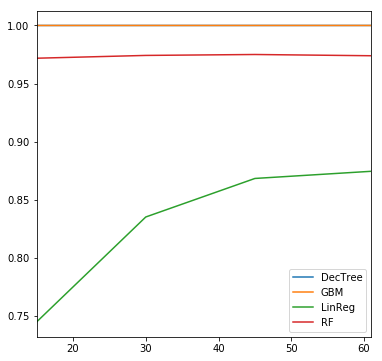

In [94]:
train_scores_df.plot(figsize=(6,6))

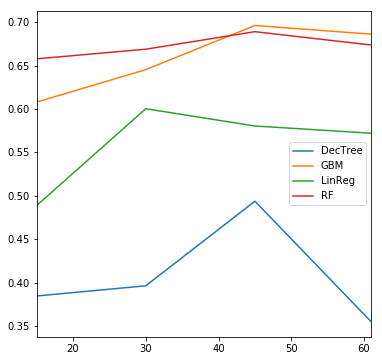

In [95]:
test_scores_df.plot(figsize=(6,6))

In [96]:
train_scores_df

,DecTree,GBM,LinReg,RF
15,0.999997,0.999987,0.745146,0.971849
30,0.999997,0.999997,0.835375,0.974251
45,0.999997,0.999997,0.868504,0.975047
61,1.000000,1.000000,0.874669,0.973972


In [97]:
test_scores_df

,DecTree,GBM,LinReg,RF
15,0.384510,0.607982,0.488655,0.657802
30,0.396271,0.645381,0.600324,0.668916
45,0.493739,0.696277,0.580431,0.689131
61,0.354574,0.686231,0.572104,0.673712
